In [4]:
import matplotlib.pyplot as plt 
import numpy as np
from scipy.io import wavfile
from IPython.display import Audio

Script to turn a sequence into audio tones. 
It maps the value of the sequence to a frequency, then converts the sequence of tones to a .wav file.


In [14]:
class Songify:
    '''
    squence, list: sequency which will be turned to a song
    f0, float: base frequency
    sr, int : sampling rate
    lt, float : length of each tone
    fname, string : name of output .wav file, must end in
    '''
    def __init__(self, sequence, f0, sr, lt, fname):
        self.seq = sequence
        self.f0 = f0
        self.sr = sr
        self.lt = lt
        self.fname = fname
    
    def to_song(self):
        f = lambda x: self.f0 * 2**(x/36)
        song = []

        for i in self.seq:
            freq = f(i)
            x = np.linspace(0, self.lt * 2 * np.pi * freq, int(self.sr * self.lt))
            song.append(np.array(np.sin(x), dtype='float32'))

        song = np.array(song).ravel()
        wavfile.write(self.fname+".wav", self.sr, song)
        songified = Audio(self.fname+".wav")
        return songified



### Use a recaman series as exemple

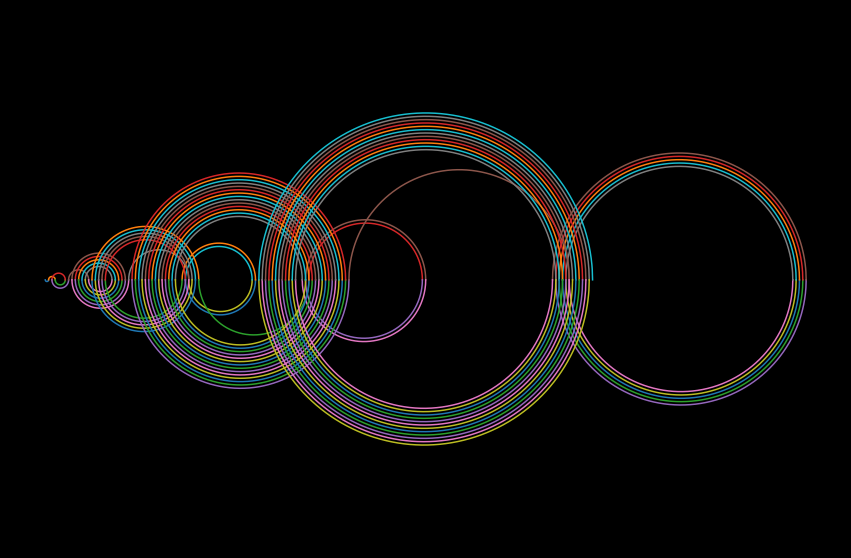

<Figure size 432x288 with 0 Axes>

In [20]:
# recursively call the sequence
def recaman(n, base_case=0):
    """Generates Recaman sequence
    Function calculates first n terms of sequence. 
    Since it returns a list, which is 0-indexed, to get 
    the correct n-th term, call as recaman(n+1)
    
    Parameters
    ----------
    n : int
        index up to which the sequence is calculated
    base_case : int 
        base case of the recursion relation
    
    Returns
    -------
    seq : list
        list containing each element of recaman sequence up to n
    """
    seq = [0]*n
    seq[0] = base_case
    for i in range(1, n):
        if (seq[i-1]-i) > 0 and (seq[i-1] - i) not in seq:
            seq[i] = seq[i-1] - i
        else:
            seq[i] = seq[i-1] + i
    return seq

# function to pretty arcs
def plot_arc(an, an_, n):
    '''takes the n, n-1 terms of the sequence as well as n and plots an arc from those'''
    center = (an + an_)/2.
    radius = abs(an - an_)/2
    x = np.linspace(-radius,radius,1000)
    y = np.sqrt(radius**2 - x**2) * (-1)**n
    ax.plot(x+center,y)

N = 100
rec66 = recaman(N+1)

plt.close(30);fig=plt.figure(30,facecolor='k',figsize=(15,10));ax=fig.subplots()
ax.axis('equal')
ax.axis('off')
[plot_arc(rec66[i],rec66[i-1],i) for i in range(1,len(rec66))]
plt.show()
plt.savefig('recaman-100.png', facecolor=fig.get_facecolor(), edgecolor='none',transparent=True)

In [17]:
MySong = Songify(rec66, 466.16/6, 8192, 0.2, 'rec100')
play = MySong.to_song()
play